Computing for SUE - Final Exam - Jamie Walker - May 10, 2021

In [1]:

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib


In [54]:
##changing directory
import os
os.chdir('/Users/jamiewalker426/Downloads')

      

Problem 1

In [4]:
##load data
evictions_data=pd.read_csv('Evictions.csv')
evictions_data.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,251242/18,486116,2265 FIFTH AVENUE,MC,01/09/2019,Danny,Weinheim,Residential,MANHATTAN,10037,Not an Ejectment,Possession,40.814336,-73.936454,11.0,9.0,210.0,1081108.0,1.017600e+09,East Harlem North
1,B800733/17,379236,1151 EAST 229TH STREET,12C,12/06/2017,Richard,McCoy,Residential,BRONX,10466,Not an Ejectment,Eviction,40.886169,-73.845052,12.0,12.0,458.0,2094152.0,2.049050e+09,Eastchester-Edenwald-Baychester
2,46164/17,76224,501 EAST 161ST ST,4E,11/08/2017,Henry,Daley,Residential,BRONX,10451,Not an Ejectment,Possession,40.823102,-73.910124,3.0,17.0,141.0,2116630.0,2.023660e+09,Morrisania-Melrose
3,71132/17NY,79497,100 WEST 57TH STREET,3J/3K,08/02/2018,Justin,Grossman,Residential,MANHATTAN,10019,Not an Ejectment,Possession,40.764428,-73.977470,5.0,4.0,137.0,1023456.0,1.010090e+09,Midtown-Midtown South
4,1019/19,93279,880 BOYNTON AVENUE,4K,11/19/2019,Henry,Daley,Residential,BRONX,10473,Not an Ejectment,Possession,40.821314,-73.876507,9.0,17.0,28.0,2092724.0,2.036270e+09,Soundview-Castle Hill-Clason Point-Harding Park


Describe the data, its structure, data types, formats etc
The data is a list of evictions in New York City. The structure of the data is in an array format, with categorical data for the most part.The data is in a comma seprated value or csv file format.The data types are floats, integers, and objects. The data holds all eviciton data between 2017 and the present, however, 2021 data will not be used seeing as the year has not finished yet.



Problem 2

In [6]:
evictions_data['Executed Date'] = pd.to_datetime(evictions_data['Executed Date'], format="%m/%d/%Y")
evictions_data.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,251242/18,486116,2265 FIFTH AVENUE,MC,2019-01-09,Danny,Weinheim,Residential,MANHATTAN,10037,Not an Ejectment,Possession,40.814336,-73.936454,11.0,9.0,210.0,1081108.0,1.017600e+09,East Harlem North
1,B800733/17,379236,1151 EAST 229TH STREET,12C,2017-12-06,Richard,McCoy,Residential,BRONX,10466,Not an Ejectment,Eviction,40.886169,-73.845052,12.0,12.0,458.0,2094152.0,2.049050e+09,Eastchester-Edenwald-Baychester
2,46164/17,76224,501 EAST 161ST ST,4E,2017-11-08,Henry,Daley,Residential,BRONX,10451,Not an Ejectment,Possession,40.823102,-73.910124,3.0,17.0,141.0,2116630.0,2.023660e+09,Morrisania-Melrose
3,71132/17NY,79497,100 WEST 57TH STREET,3J/3K,2018-08-02,Justin,Grossman,Residential,MANHATTAN,10019,Not an Ejectment,Possession,40.764428,-73.977470,5.0,4.0,137.0,1023456.0,1.010090e+09,Midtown-Midtown South
4,1019/19,93279,880 BOYNTON AVENUE,4K,2019-11-19,Henry,Daley,Residential,BRONX,10473,Not an Ejectment,Possession,40.821314,-73.876507,9.0,17.0,28.0,2092724.0,2.036270e+09,Soundview-Castle Hill-Clason Point-Harding Park


In [7]:
print ('Total Evictions',len(evictions_data))
print ('2017 Evictions',len(evictions_data[(evictions_data['Executed Date']>'2017-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2017-12-31 23:59:59.0000')]))
print ('2018 Evictions',len(evictions_data[(evictions_data['Executed Date']>'2018-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2018-12-31 23:59:59.0000')]))
print ('2019 Evictions',len(evictions_data[(evictions_data['Executed Date']>'2019-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2019-12-31 23:59:59.0000')]))
print ('2020 Evictions',len(evictions_data[(evictions_data['Executed Date']>'2020-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2020-12-31 23:59:59.0000')]))


Total Evictions 66402
2017 Evictions 22530
2018 Evictions 21830
2019 Evictions 18647
2020 Evictions 3387


Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?

Evictions have been on the downward trend, with the number of evictions slowly decreasing year by yer. The year with the highest number of evictions was 2017, with 2020 being the lowest. I had already assumed 2020 would be the lowest, seeing as Evicitions were halted in 2020 due to the Covid-19 Pandemic. However, I was not expecting to see suh a large number of evicitons for the other years, and the high numbers definitley surprised me.

Problem 3

In [9]:
print('Total Residential', len(evictions_data[(evictions_data['Residential/Commercial']=='Residential')]))
print('Total Commercial', len(evictions_data[(evictions_data['Residential/Commercial']=='Commercial')]))
print('Total Ratio', (len(evictions_data[(evictions_data['Residential/Commercial']=='Commercial')]))/(len(evictions_data[(evictions_data['Residential/Commercial']=='Residential')])))


Total Residential 60809
Total Commercial 5593
Total Ratio 0.09197651663405088


In [10]:
data_2017=(evictions_data[(evictions_data['Executed Date']>'2017-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2017-12-31 23:59:59.0000')])
data_2018=(evictions_data[(evictions_data['Executed Date']>'2018-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2018-12-31 23:59:59.0000')])
data_2019=(evictions_data[(evictions_data['Executed Date']>'2019-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2019-12-31 23:59:59.0000')])
data_2020=(evictions_data[(evictions_data['Executed Date']>'2020-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2020-12-31 23:59:59.0000')])
print('2017 Ratio', (len(data_2017[(data_2017['Residential/Commercial']=='Commercial')]))/(len(data_2017[(data_2017['Residential/Commercial']=='Residential')]) ))
print('2018 Ratio', (len(data_2018[(data_2018['Residential/Commercial']=='Commercial')]))/(len(data_2018[(data_2018['Residential/Commercial']=='Residential')]) ))
print('2019 Ratio', (len(data_2019[(data_2019['Residential/Commercial']=='Commercial')]))/(len(data_2019[(data_2019['Residential/Commercial']=='Residential')]) ))
print('2020 Ratio', (len(data_2020[(data_2020['Residential/Commercial']=='Commercial')]))/(len(data_2020[(data_2020['Residential/Commercial']=='Residential')]) ))
ratio_2017=((len(data_2017[(data_2017['Residential/Commercial']=='Commercial')]))/(len(data_2017[(data_2017['Residential/Commercial']=='Residential')])))
ratio_2018=((len(data_2018[(data_2018['Residential/Commercial']=='Commercial')]))/(len(data_2018[(data_2018['Residential/Commercial']=='Residential')])))
ratio_2019=((len(data_2019[(data_2019['Residential/Commercial']=='Commercial')]))/(len(data_2019[(data_2019['Residential/Commercial']=='Residential')])))
ratio_2020=((len(data_2020[(data_2020['Residential/Commercial']=='Commercial')]))/(len(data_2020[(data_2020['Residential/Commercial']=='Residential')])))
total_ratio=((len(evictions_data[(evictions_data['Residential/Commercial']=='Commercial')]))/(len(evictions_data[(evictions_data['Residential/Commercial']=='Residential')])))


2017 Ratio 0.0826525708793849
2018 Ratio 0.09215529317590554
2019 Ratio 0.09849779086892489
2020 Ratio 0.11598023064250412


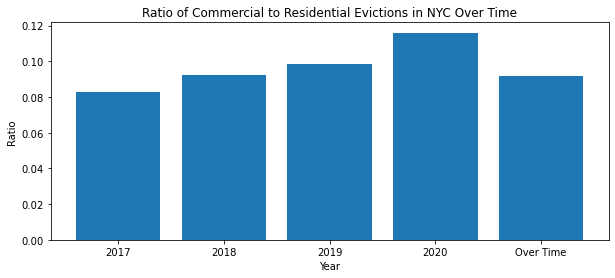

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
ratios = [ratio_2017, ratio_2018, ratio_2019, ratio_2020, total_ratio]
years = ['2017', '2018', '2019', '2020', 'Over Time']
plt.bar(years, ratios)
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Ratio of Commercial to Residential Evictions in NYC Over Time')

plt.show()

What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found.

The Total ratio was 0.0919 for all 4 years, or 9.19%. The ratio of commercial to resedential evictions did stay pretty close together, however there was trend of increasing each year by just a bit, meaning the 2018, 2019, and 2020 ratios are higher than the total ratio, whilst the 2017 ratio is still the lowest. 


Problem 4

In [13]:
evictions_data['Full Name'] = evictions_data['Marshal First Name'].str.cat(evictions_data['Marshal Last Name'],sep=" ")
data_2017['Full Name'] = data_2017['Marshal First Name'].str.cat(data_2017['Marshal Last Name'],sep=" ")
data_2018['Full Name'] = data_2018['Marshal First Name'].str.cat(data_2018['Marshal Last Name'],sep=" ")
data_2019['Full Name'] = data_2019['Marshal First Name'].str.cat(data_2019['Marshal Last Name'],sep=" ")
data_2020['Full Name'] = data_2020['Marshal First Name'].str.cat(data_2020['Marshal Last Name'],sep=" ")

<ipython-input-13-8b73906b23ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2017['Full Name'] = data_2017['Marshal First Name'].str.cat(data_2017['Marshal Last Name'],sep=" ")
<ipython-input-13-8b73906b23ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018['Full Name'] = data_2018['Marshal First Name'].str.cat(data_2018['Marshal Last Name'],sep=" ")
<ipython-input-13-8b73906b23ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [14]:
##Top 5 Marshalls overtime
n = 5
evictions_data['Full Name'].value_counts()[:n].index.tolist()

['Justin Grossman',
 'Henry Daley',
 'Ileana Rivera',
 'Thomas Bia',
 'Edward Guida']

In [15]:
##Top 5 Marshalls 2017
n = 5
data_2017['Full Name'].value_counts()[:n].index.tolist()

['Justin Grossman',
 'Danny Weinheim',
 'Ileana Rivera',
 'Thomas Bia',
 'Edward Guida']

In [16]:
##Top 5 Marshalls 2018
n = 5
data_2018['Full Name'].value_counts()[:n].index.tolist()

['Justin Grossman',
 'Henry Daley',
 'Ileana Rivera',
 'Thomas Bia',
 'Edward Guida']

In [17]:
##Top 5 Marshalls 2019
n = 5
data_2019['Full Name'].value_counts()[:n].index.tolist()

['Justin Grossman',
 'Henry Daley',
 'Ileana Rivera',
 'Edward Guida',
 'Thomas Bia']

In [18]:
##Top 5 Marshalls 2020
n = 5
data_2020['Full Name'].value_counts()[:n].index.tolist()

['Justin Grossman',
 'Henry Daley',
 'Edward Guida',
 'Ileana Rivera',
 'Thomas Bia']

What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)?

The top 5 eviction marshalls for the total of all four years were, in order from largest number to smallest number, Justin Grossman, Henry Daley, Ileana Rivera, Thomas Bia, and Edward Guida. However, as it can be seen above, throughout those four years the names did move around a little, with Danny Weinheim only making the top 5 in 2017. However, Justin Grossman remained at the number one spot for highest amount of evictions throughout all four years. 

Problem 5

In [19]:
print('2017 Evictions', '\n', data_2017['BOROUGH'].value_counts(), '\n')
print('2018 Evictions', '\n', data_2018['BOROUGH'].value_counts(), '\n')
print('2019 Evictions', '\n', data_2019['BOROUGH'].value_counts(), '\n')
print('2020 Evictions', '\n', data_2020['BOROUGH'].value_counts(), '\n')
print('Total Evictions', '\n', evictions_data['BOROUGH'].value_counts(), '\n')

2017 Evictions 
 BRONX            7662
BROOKLYN         6357
QUEENS           4325
MANHATTAN        3452
STATEN ISLAND     734
Name: BOROUGH, dtype: int64 

2018 Evictions 
 BRONX            7140
BROOKLYN         6157
QUEENS           4452
MANHATTAN        3390
STATEN ISLAND     691
Name: BOROUGH, dtype: int64 

2019 Evictions 
 BRONX            6188
BROOKLYN         5312
QUEENS           3705
MANHATTAN        2806
STATEN ISLAND     636
Name: BOROUGH, dtype: int64 

2020 Evictions 
 BRONX            1061
BROOKLYN         1003
QUEENS            693
MANHATTAN         518
STATEN ISLAND     112
Name: BOROUGH, dtype: int64 

Total Evictions 
 BRONX            22053
BROOKLYN         18832
QUEENS           13177
MANHATTAN        10167
STATEN ISLAND     2173
Name: BOROUGH, dtype: int64 



How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.

Over time and throughout the 4 years, the boroughs remained in the same order in terms of number of evicitons within that borough during that year. The Bronx always had the highest number of evictions, and Staten Island always having the smallest number of evictions, with Brooklyn, Queens, and Manhattan taking the 2nd, 3rd, and 4th places, respectively. The population of these boroughs happens to fall into the pattern of Brooklyn, Queens, Bronx, Manhattan, Staten Island, with Brooklyn having the highest population and Staten Island Having the smallest. While they may not align exactly, it does make sense, as the Bronx is unfortunately the least affluent borough within NYC, which would mean the highest number of evicitions being in that borough would make sense.

Problem 6

In [21]:

NTA=gpd.read_file("NTA_Map")
NTA.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."


In [47]:
NTA_2017count=data_2017.groupby(['NTA']).count()
NTA_2018count=data_2018.groupby(['NTA']).count()
NTA_2019count=data_2019.groupby(['NTA']).count()
NTA_2020count=data_2020.groupby(['NTA']).count()
NTA_Totalcount=evictions_data.groupby(['NTA']).count()

NTA_2017 = gpd.read_file("NTA_MAP")
NTA_2017['NTA'] = NTA_2017['ntaname']
NTA_2017 = NTA_2017.merge(NTA_2017count, on='NTA')
NTA_2017 = NTA_2017.merge(data_2017, on='NTA')


NTA_2018 = gpd.read_file("NTA_MAP")
NTA_2018['NTA'] = NTA_2018['ntaname']
NTA_2018 = NTA_2018.merge(NTA_2018count, on='NTA')
NTA_2018 = NTA_2018.merge(data_2018, on='NTA')

NTA_2019 = gpd.read_file("NTA_MAP")
NTA_2019['NTA'] = NTA_2019['ntaname']
NTA_2019 = NTA_2019.merge(NTA_2019count, on='NTA')
NTA_2019 = NTA_2019.merge(data_2019, on='NTA')

NTA_2020 = gpd.read_file("NTA_MAP")
NTA_2020['NTA'] = NTA_2020['ntaname']
NTA_2020 = NTA_2020.merge(NTA_2020count, on='NTA')
NTA_2020 = NTA_2020.merge(data_2020, on='NTA')

NTA_Total = gpd.read_file("NTA_MAP")
NTA_Total['NTA'] = NTA_Total['ntaname']
NTA_Total = NTA_Total.merge(NTA_Totalcount, on='NTA')
NTA_Total = NTA_Total.merge(evictions_data, on='NTA')
print(NTA_2017count.max())
print(NTA_2018count.max())
print(NTA_2019count.max())
print(NTA_2020count.max())
print(NTA_Totalcount.max())


Court Index Number           454
Docket Number                454
Eviction Address             454
Eviction Apartment Number    451
Executed Date                454
Marshal First Name           454
Marshal Last Name            454
Residential/Commercial       454
BOROUGH                      454
Eviction Postcode            454
Ejectment                    454
Eviction/Legal Possession    454
Latitude                     454
Longitude                    454
Community Board              454
Council District             454
Census Tract                 454
BIN                          454
BBL                          454
Full Name                    454
dtype: int64
Court Index Number           460
Docket Number                460
Eviction Address             460
Eviction Apartment Number    405
Executed Date                460
Marshal First Name           460
Marshal Last Name            460
Residential/Commercial       460
BOROUGH                      460
Eviction Postcode            4

Text(0.5, 1.0, '2017 Evictions')

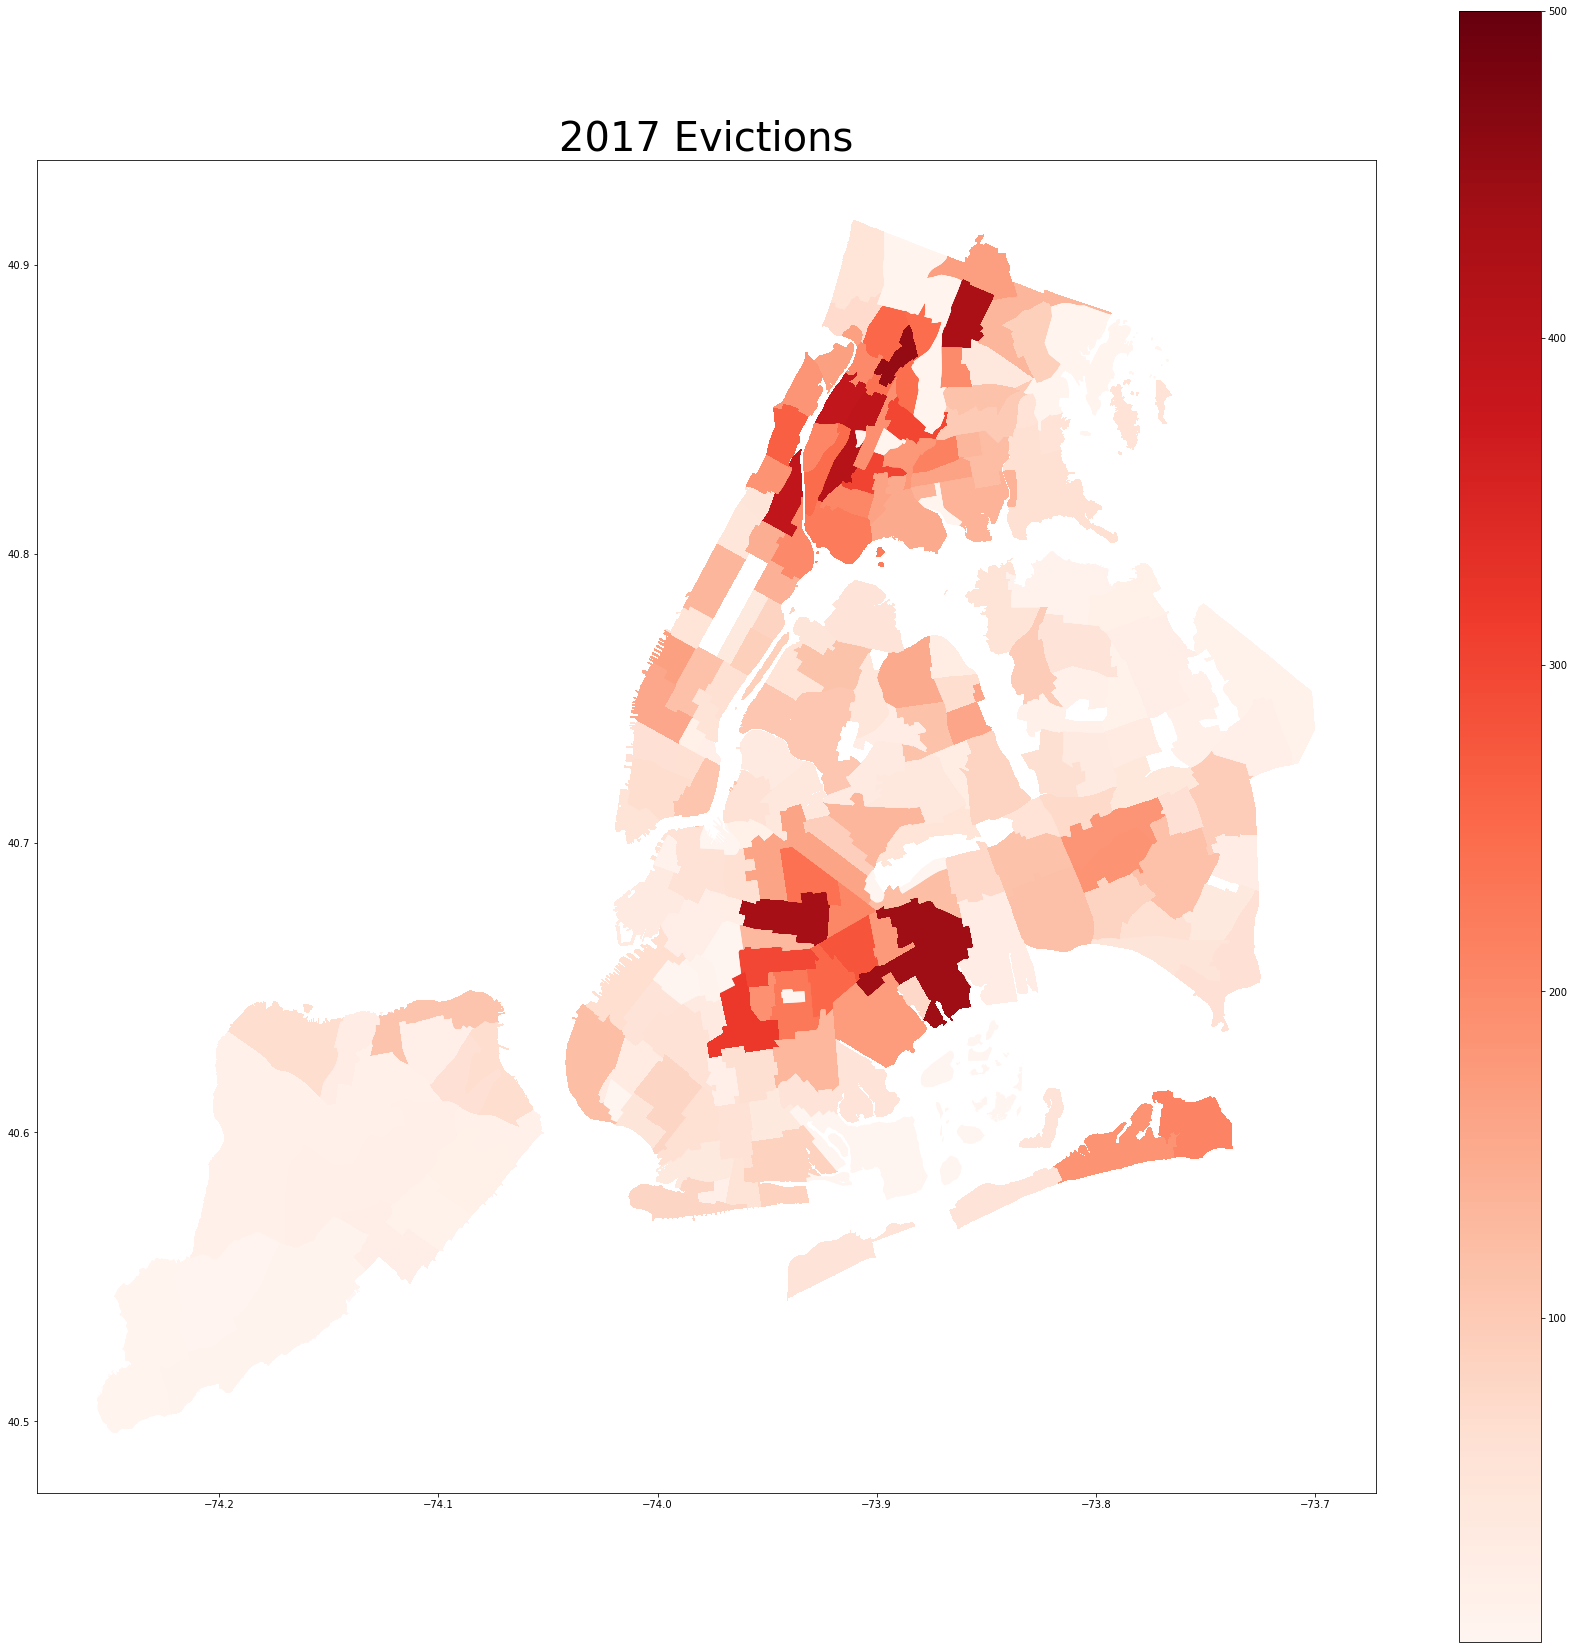

In [48]:
NTA_2017.plot(column='Court Index Number_x',figsize=(30, 30),legend=True, vmin=1, vmax=500, cmap='Reds')
plt.title('2017 Evictions', fontsize=40)

Text(0.5, 1.0, '2018 Evictions')

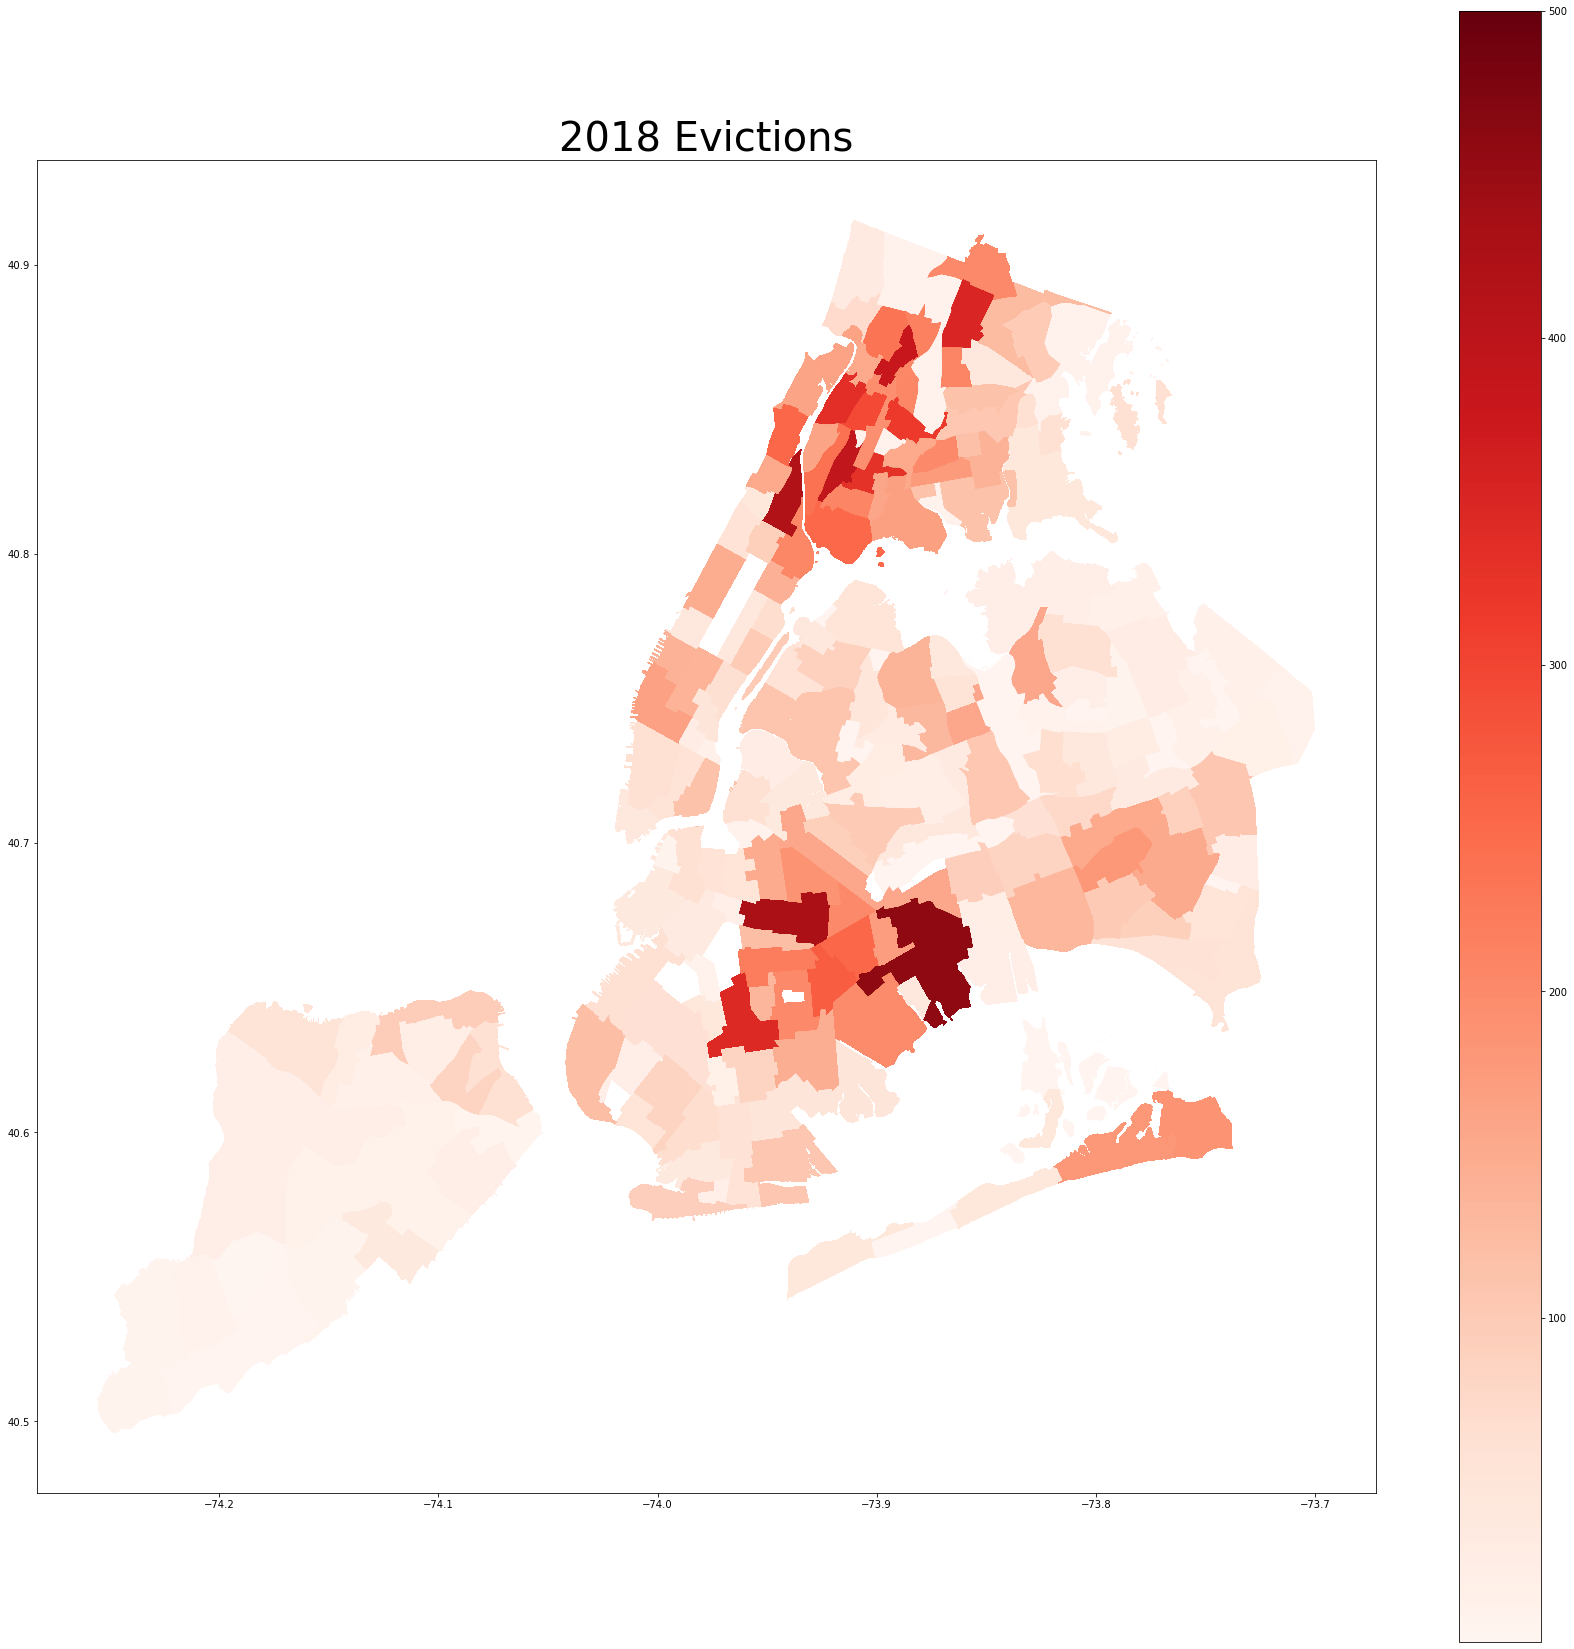

In [49]:
NTA_2018.plot(column='Court Index Number_x',figsize=(30, 30),legend=True, vmin=1, vmax=500, cmap='Reds')
plt.title('2018 Evictions', fontsize=40)

Text(0.5, 1.0, '2019 Evictions')

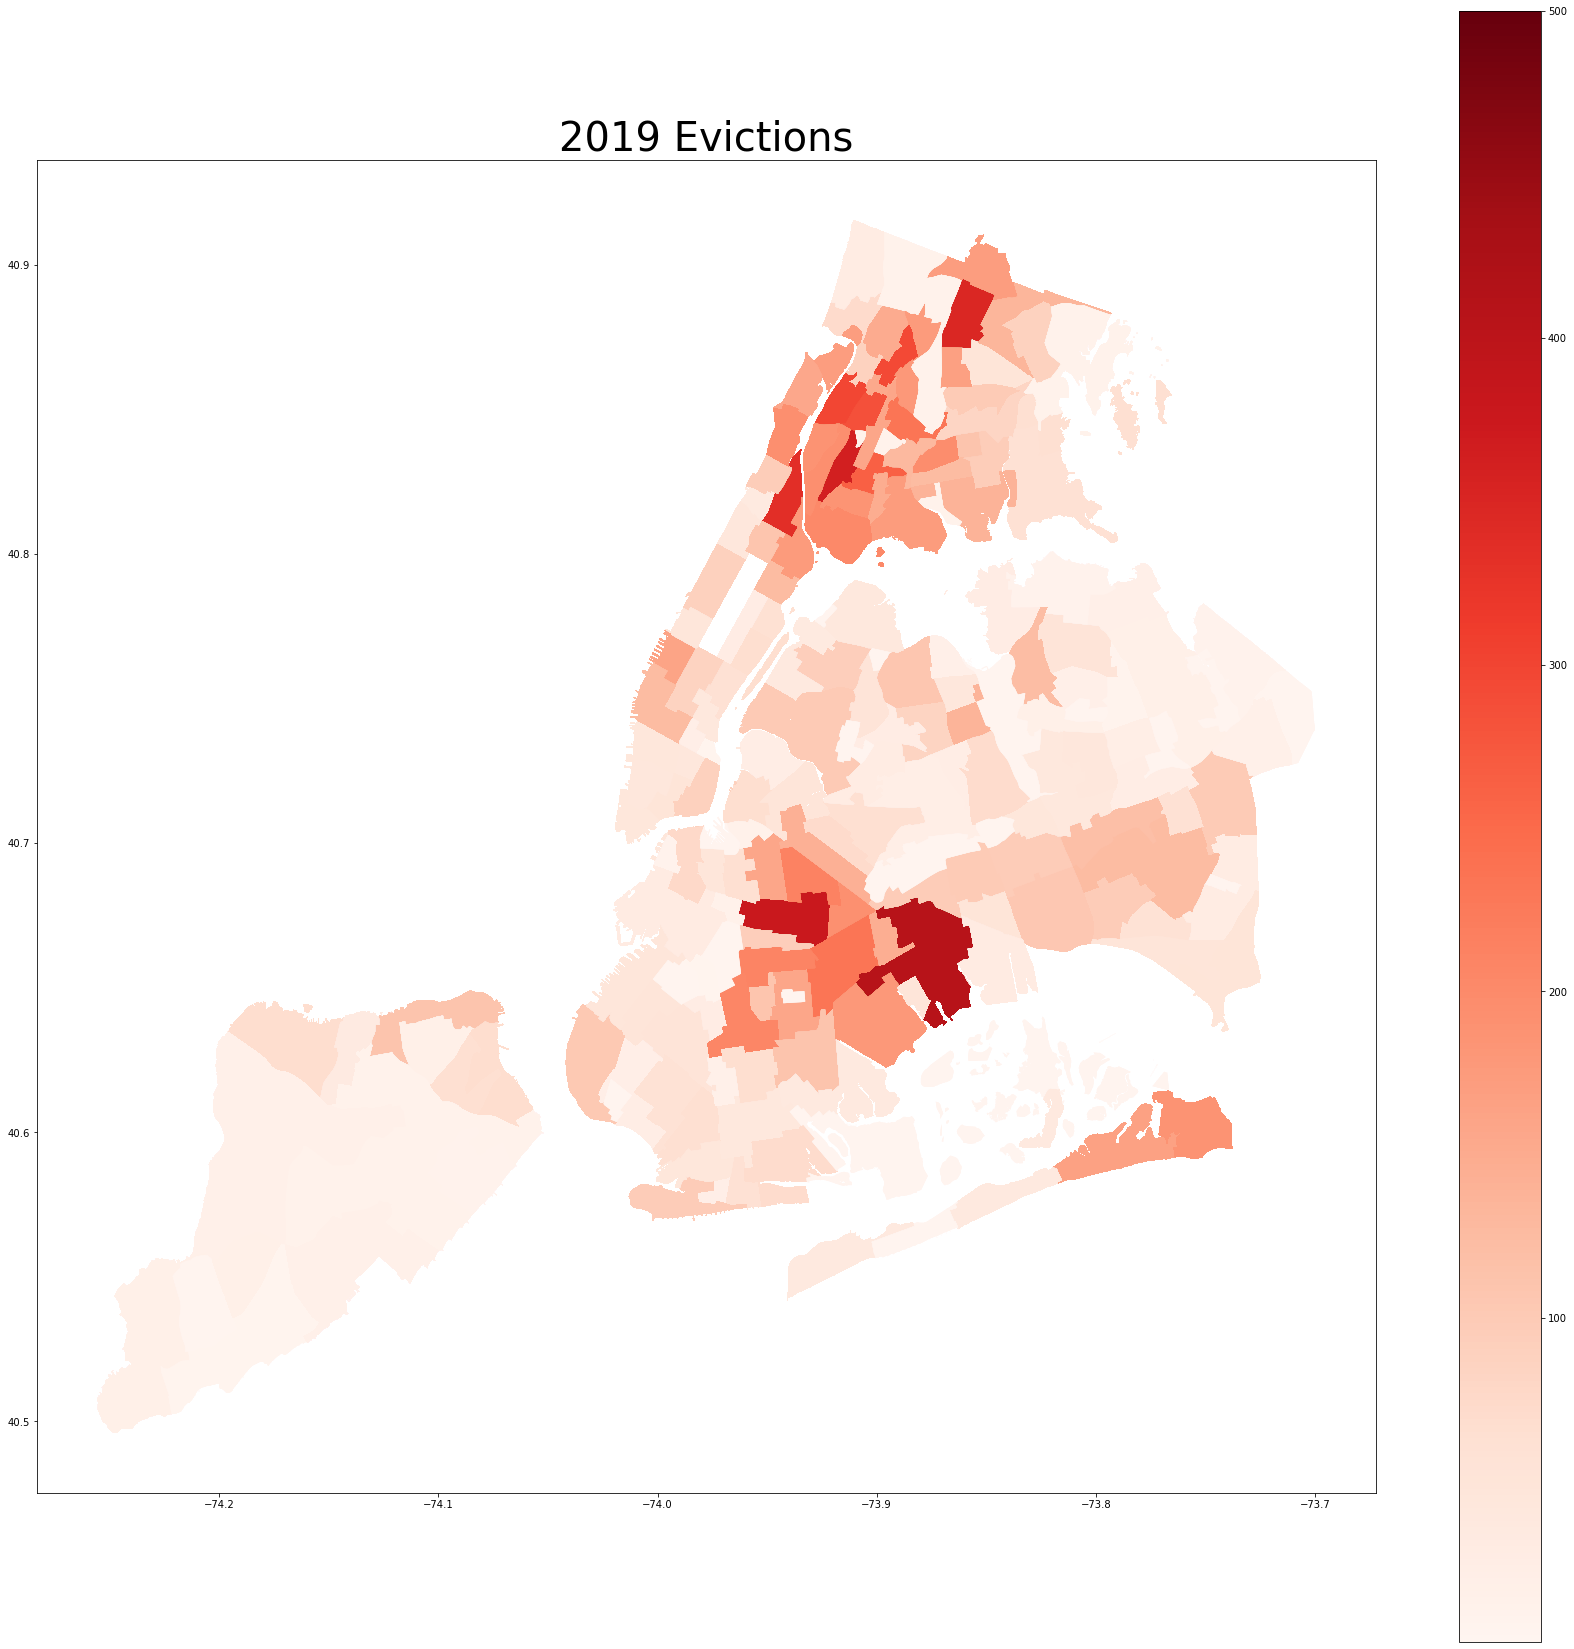

In [50]:
NTA_2019.plot(column='Court Index Number_x',figsize=(30, 30),legend=True, vmin=1, vmax=500, cmap='Reds')
plt.title('2019 Evictions', fontsize=40)

Text(0.5, 1.0, '2020 Evictions')

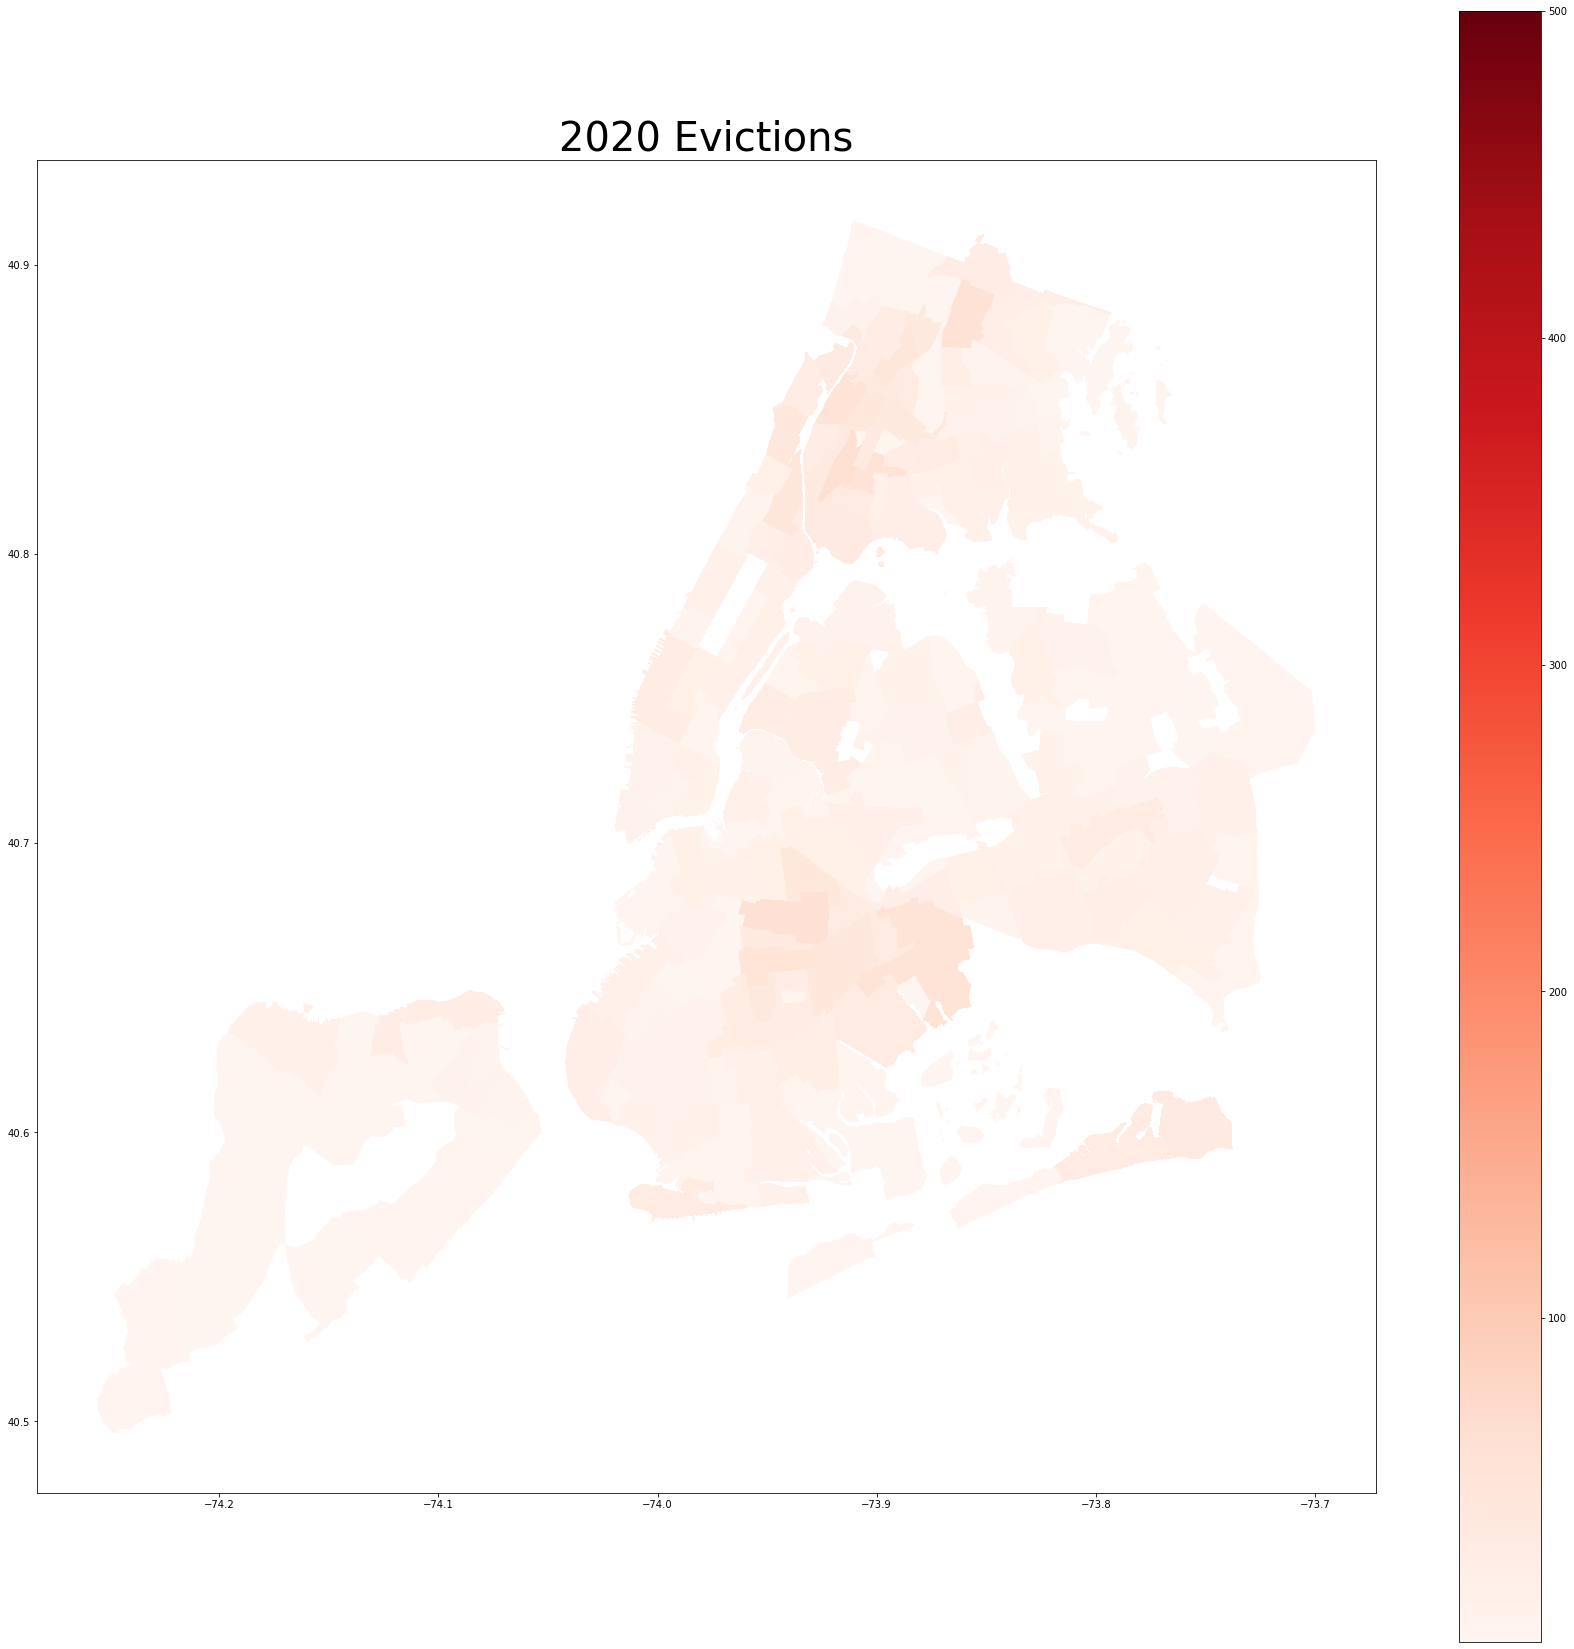

In [51]:
NTA_2020.plot(column='Court Index Number_x',figsize=(30, 30),legend=True, vmin=1, vmax=500, cmap='Reds')
plt.title('2020 Evictions', fontsize=40)

Text(0.5, 1.0, 'Total Evictions')

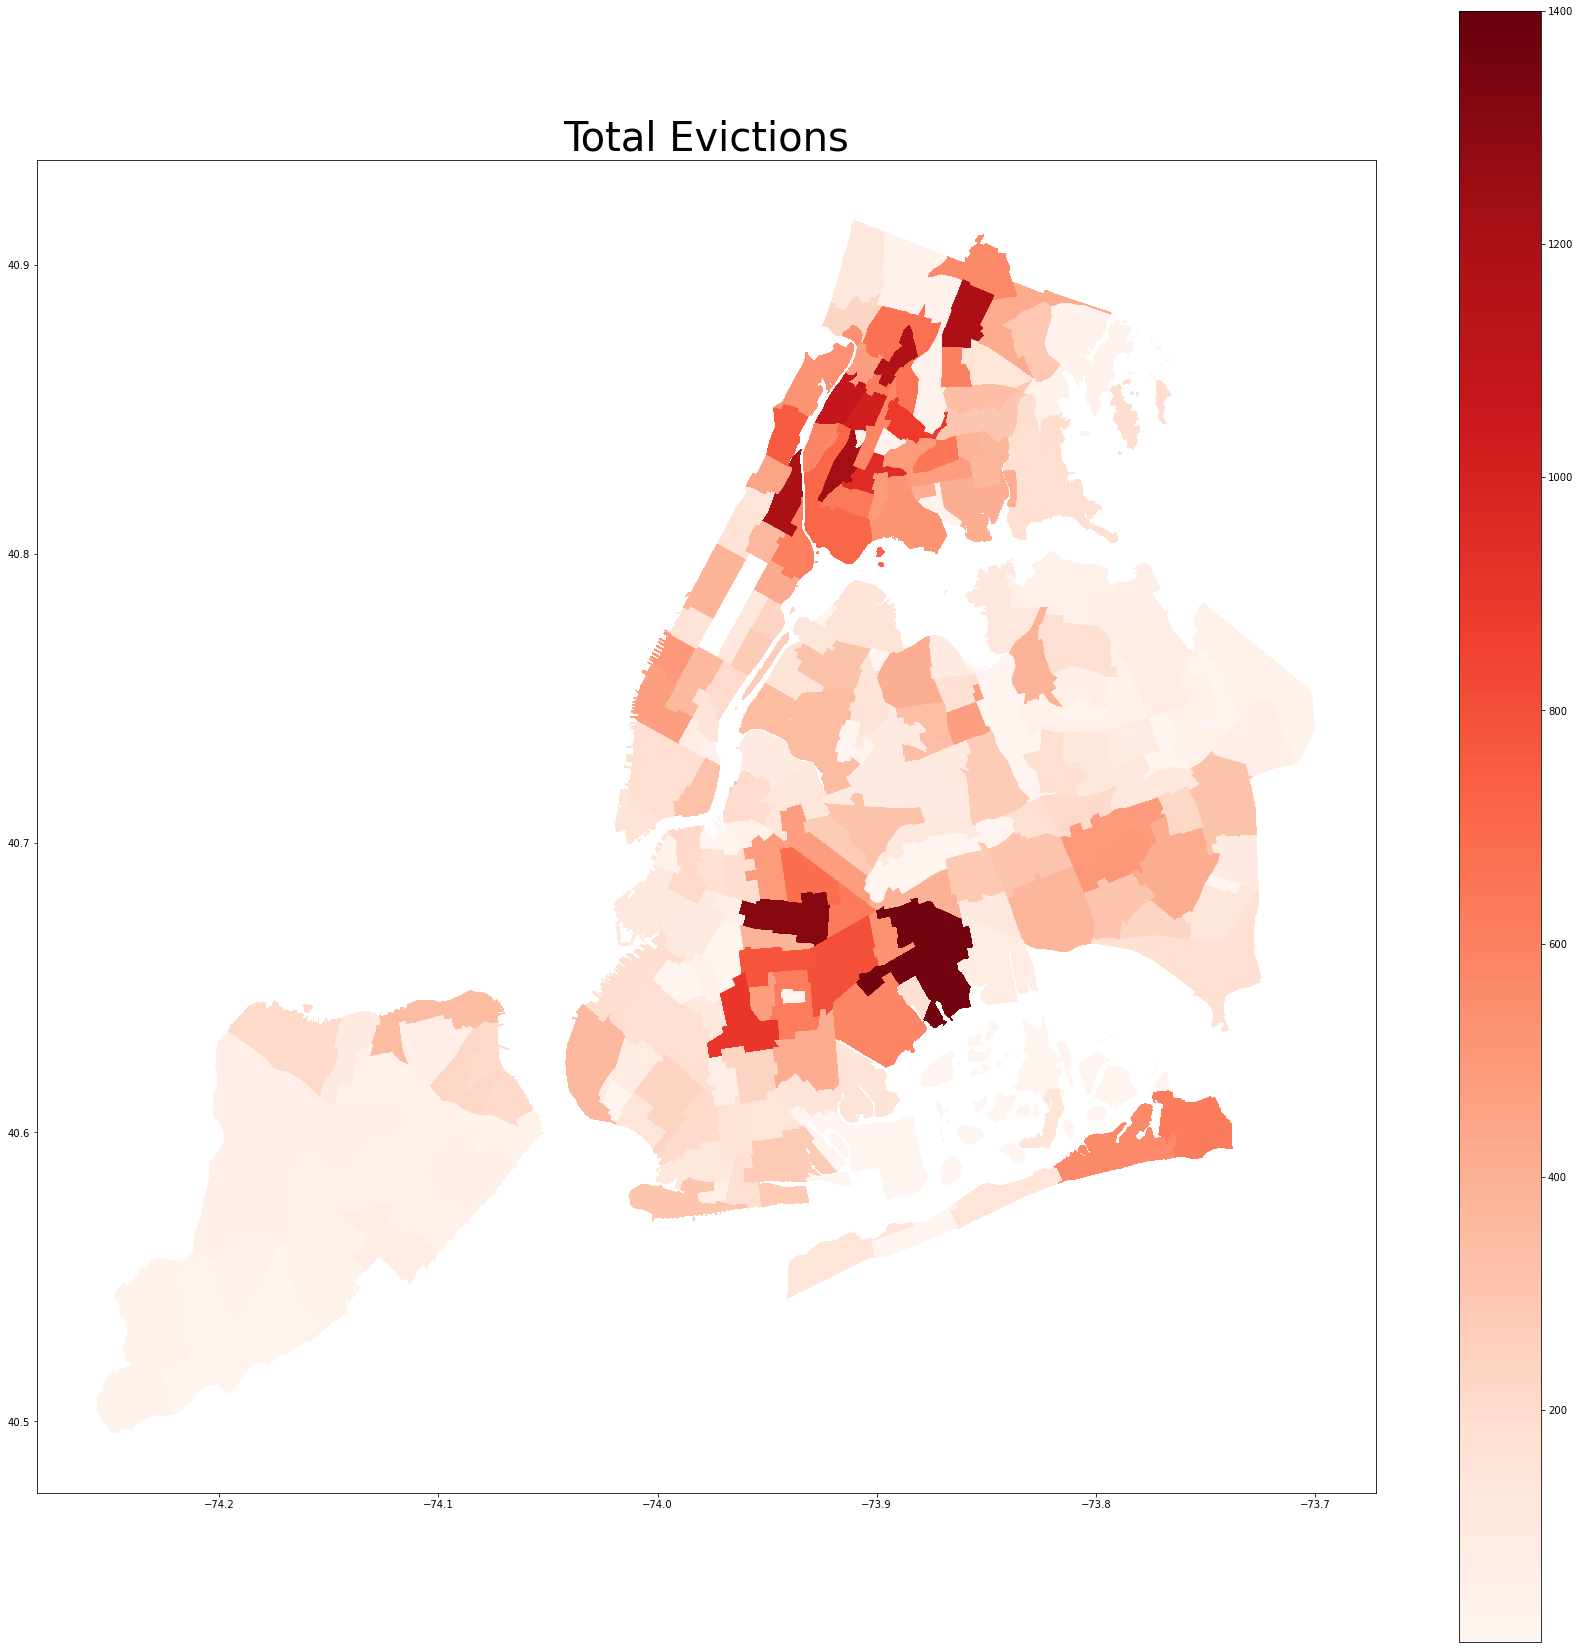

In [52]:
NTA_Total.plot(column='Court Index Number_x',figsize=(30, 30),legend=True, vmin=1, vmax=1400, cmap='Reds')
plt.title('Total Evictions', fontsize=40)

Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings.

The maps do not differ all that much, other than the map for 2020, which was to be expected as evicitons were halted in 2020 due to the COVID-19 Pandemic. It seems as though the highest numbers of evicitions take place in central and western Brooklyn, as well as central Bronx. Queens seems to have a relatively even spread, as do Manhattan and staten Island, with the exception of northern Manhattan.

Problem 7

In [59]:
demolition_data=pd.read_csv('DOB_Job_Application_Filings.csv')
demolition_data.head()

/Users/jamiewalker426/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (43,59,66,74,75,76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,421747694,1,QUEENS,46-31,204 ST,7317,9,4623073,DM,X,...,N,NaN,B2,0,40.754908,-73.777645,19.0,145102.0,Bayside-Bayside Hills,4156960.0
1,421757888,1,QUEENS,117-45 GAR,165 STREET,12356,2,4611279,DM,E,...,N,NaN,V0,0,40.684536,-73.781088,27.0,284.0,Baisley Park,NaN
2,322036541,1,BROOKLYN,82,4 AVE,389,42,3006003,DM,E,...,N,NaN,S9,0,40.682028,-73.979932,33.0,127.0,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,3006003.0
3,322036532,1,BROOKLYN,80A,4 AVE,389,41,3006002,DM,E,...,N,NaN,S9,0,40.682102,-73.979885,33.0,127.0,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,3006002.0
4,166003266,1,MANHATTAN,1343,2 AVE,1425,26,1043926,DM,A,...,N,NaN,C7,0,40.767933,-73.959011,4.0,126.0,Lenox Hill-Roosevelt Island,1043926.0


In [60]:
dem2017=pd.read_csv('DOB2017.csv')
dem2017.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,123066127,2,MANHATTAN,1,PARK ROW,90,1,1085949,DM,E,...,W,09/30/2020,K2,0,40.711395,-74.008156,1.0,1501.0,Battery Park City-Lower Manhattan,1085949.0
1,321515455,1,BROOKLYN,464,QUENTIN ROAD,6661,11,3253613,DM,X,...,N,NaN,A3,0,40.607040,-73.969165,44.0,422.0,Homecrest,3253613.0
2,321646974,1,BROOKLYN,1926,OCEAN PARKWAY,7108,147,3191999,DM,A,...,N,NaN,B2,0,40.601665,-73.966225,47.0,41402.0,Homecrest,3191999.0
3,421215857,1,QUEENS,133-11,124TH STREET,11783,31,4256017,DM,E,...,N,NaN,A2,0,40.671080,-73.814882,28.0,838.0,South Ozone Park,4256017.0
4,421263224,2,QUEENS,131-34,41 AVE,5062,4,4114968,DM,X,...,N,NaN,F5,0,40.755471,-73.835084,20.0,849.0,Flushing,4617859.0


In [61]:
dem2018=pd.read_csv('DOB2018.csv')
dem2018.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,421099769,1,QUEENS,38-04,48TH STREET,125,10,4000846,DM,E,...,N,NaN,K4,0,40.749939,-73.915452,26.0,169.0,Hunters Point-Sunnyside-West Maspeth,4000846.0
1,421424453,1,QUEENS,34-01,COLLEGE POINT BLVD,4945,34,4868232,DM,X,...,N,NaN,E7,0,40.764869,-73.836873,20.0,869.0,Flushing,4000000.0
2,321614044,1,BROOKLYN,7500GAR,BAY PARKWAY,6230,39,3345281,DM,X,...,N,NaN,D1,0,40.608049,-73.987474,44.0,268.0,Bensonhurst West,NaN
3,520329127,1,STATEN ISLAND,33,TANGLEWOOD DRIVE,4500,15,5164926,DM,X,...,N,NaN,A5,0,40.566906,-74.151504,51.0,14606.0,Great Kills,NaN
4,321607196,1,BROOKLYN,951,EAST 13 STREET,6706,65,3341600,DM,Q,...,W,04/26/2019,V0,0,40.626230,-73.963475,44.0,530.0,Midwood,3341600.0


In [62]:
dem2019=pd.read_csv('DOB2019.csv')
dem2019.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,421747694,1,QUEENS,46-31,204 ST,7317,9,4623073,DM,X,...,N,NaN,B2,0,40.754908,-73.777645,19.0,145102.0,Bayside-Bayside Hills,4156960.0
1,421936891,1,QUEENS,14-17,117 ST,4052,7,4098011,DM,E,...,W,05/05/2021,B2,0,40.785226,-73.850372,19.0,929.0,College Point,4098011.0
2,520389918,1,STATEN ISLAND,24,PORT RICHMOND AVENUE,1073,70,5107039,DM,E,...,W,05/06/2021,M1,0,40.640071,-74.131791,49.0,207.0,Port Richmond,5107039.0
3,520389892,1,STATEN ISLAND,2070,RICHMOND TERRACE,1073,70,5157616,DM,E,...,W,05/06/2021,M1,0,40.640340,-74.132347,49.0,207.0,Port Richmond,5157616.0
4,321909798,1,BROOKLYN,1239,EAST NEW YORK AVENUE,1477,50,3039607,DM,E,...,N,NaN,V1,0,40.667721,-73.921342,41.0,361.0,Ocean Hill,3039607.0


In [63]:
dem2020=pd.read_csv('DOB2020.csv')
dem2020.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,421757888,1,QUEENS,117-45 GAR,165 STREET,12356,2,4611279,DM,E,...,N,NaN,V0,0,40.684536,-73.781088,27.0,284.0,Baisley Park,NaN
1,322036541,1,BROOKLYN,82,4 AVE,389,42,3006003,DM,E,...,N,NaN,S9,0,40.682028,-73.979932,33.0,127.0,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,3006003.0
2,322036532,1,BROOKLYN,80A,4 AVE,389,41,3006002,DM,E,...,N,NaN,S9,0,40.682102,-73.979885,33.0,127.0,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,3006002.0
3,166003266,1,MANHATTAN,1343,2 AVE,1425,26,1043926,DM,A,...,N,NaN,C7,0,40.767933,-73.959011,4.0,126.0,Lenox Hill-Roosevelt Island,1043926.0
4,421784304,1,QUEENS,143-06,94 AVE,9992,27,4213930,DM,E,...,N,NaN,E1,0,40.698124,-73.809606,27.0,208.0,Jamaica,4213930.0


In [68]:
evictions17=(len(evictions_data[(evictions_data['Executed Date']>'2017-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2017-12-31 23:59:59.0000')]))
evictions18=(len(evictions_data[(evictions_data['Executed Date']>'2018-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2018-12-31 23:59:59.0000')]))
evictions19=(len(evictions_data[(evictions_data['Executed Date']>'2019-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2019-12-31 23:59:59.0000')]))
evictions20=(len(evictions_data[(evictions_data['Executed Date']>'2020-01-01 00:00:00.0000') 
                & (evictions_data['Executed Date']<'2020-12-31 23:59:59.0000')]))

In [65]:
dem17=(len(dem2017))
dem18=(len(dem2018))
dem19=(len(dem2019))
dem20=(len(dem2020))

Text(0, 0.5, 'Quantity')

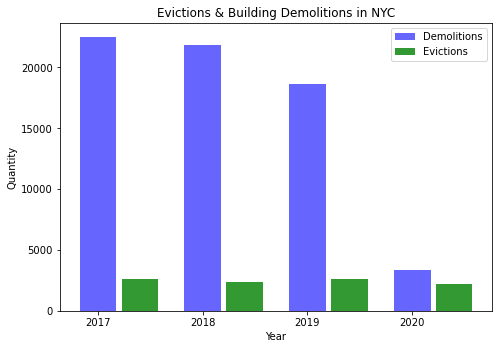

In [73]:
fig = plt.figure()

evic=[evictions17, evictions18, evictions19, evictions20]
dems= [dem17, dem18, dem19, dem20]
data=[evic, dems]
years = ['2017', '2018', '2019', '2020']

ax_length = np.arange(len(years))
ax = fig.add_axes([0,0, 1, 1])
ax.set_xticks(ax_length)
ax.set_xticklabels(years, c='k')

ax.bar(ax_length + 0.00, data[0], color = 'blue', width = 0.35, alpha = 0.6)
ax.bar(ax_length + 0.4, data[1], color = 'green', width = 0.35, alpha = 0.8)

ax.legend(["Demolitions", "Evictions"]);
ax.set_title('Evictions & Building Demolitions in NYC')

plt.xlabel('Year')
plt.ylabel('Quantity')

Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections.

I chose to look at demolition data in New York City, as I figured there may be a slight connection between the number of evictions and the number of buildings being demolished, as this could be a key sign that gentrification is happening in a neighborhood, as in some cases landlords will evict their tenants in order to sell the building for the land to be used for new development. There was a correlation, as both followed the same downward trend, with 2020 having the steepest drop in demolitions, most likely having to do with the Pandemic. However, further research needs to be done before a conclusion could be made on this correlation.

Resource for demolition data: https://data.cityofnewyork.us/Housing-Development/DOB-Job-Application-Filings/ic3t-wcy2/data